In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


We can check that we have 11 input variables and 1(Quality of wine) as putput.
The dataset consists of 1599 Rows and 12 Columns.
We can see that our goal is to identify the quality of the wine on the basis of the given input variables.

In [3]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

we don't have any missing data in our wine dataset. We are good to proceed further.

In [5]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


The above information giving us a breif details about the dataset. We can see all the values are non null and in same datatye.

In [6]:
wine.shape

(1599, 12)

we have 1599 rows and 12 columns

In [7]:
print(wine.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


we can check that our dataset only consists of float and int datatypes that is numbers which are required for machine learning. So, we don't have to use any encoding technique to convert the data

<function matplotlib.pyplot.show(*args, **kw)>

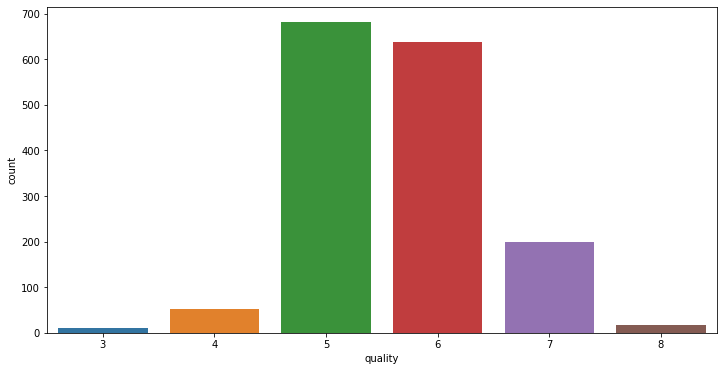

In [8]:
plt.figure(figsize = (12,6))
sns.countplot(wine['quality'])
plt.show

The label of our dataset aren't equally as we can see that we have following values for following outputs:

1.Quality 5 = 681
2.Quality 6 = 638
3.Quality 7 = 199
4.Quality 4 = 53
5.Quality 8 = 18
6.Quality 3 = 10

In [9]:
col = wine.columns

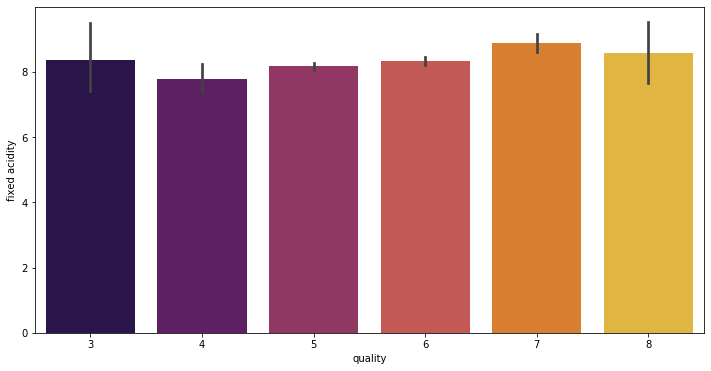

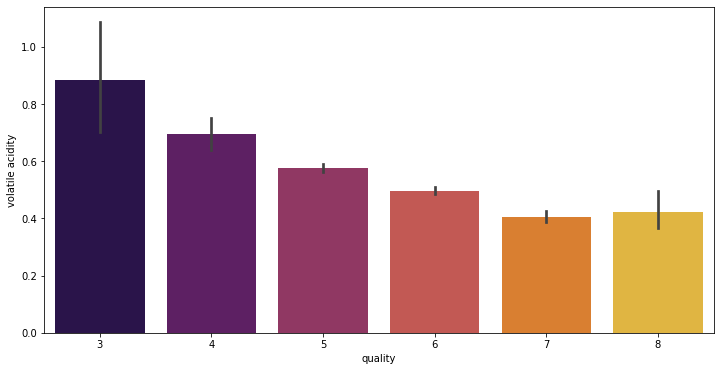

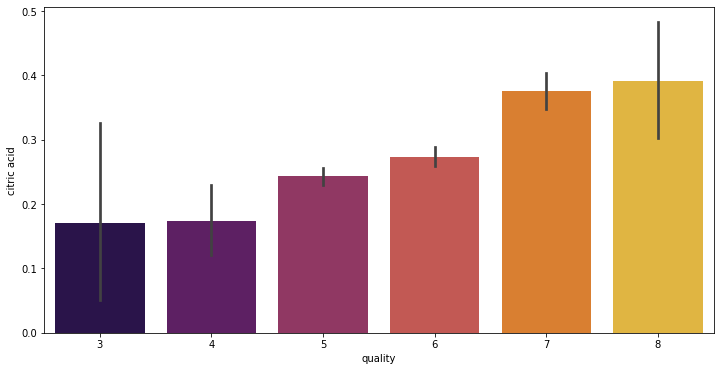

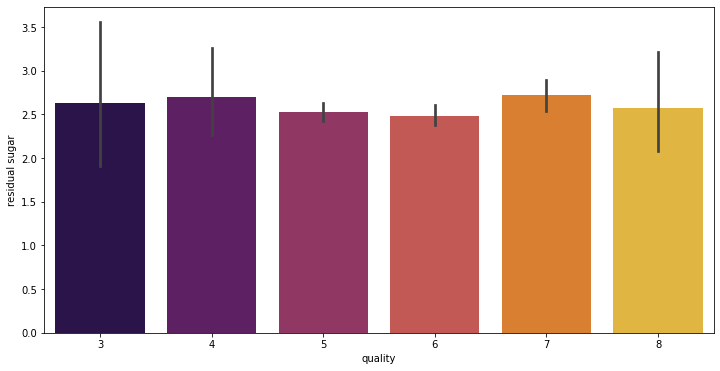

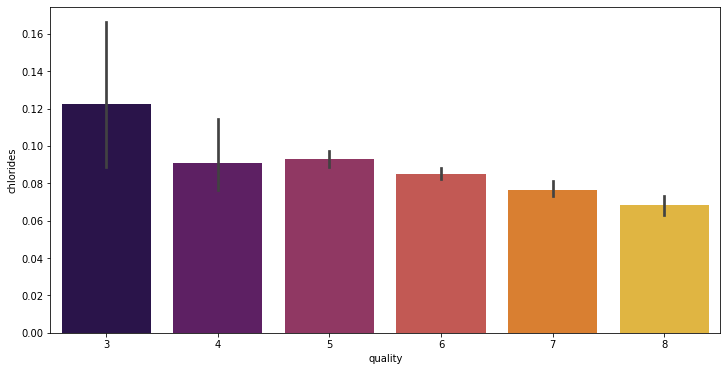

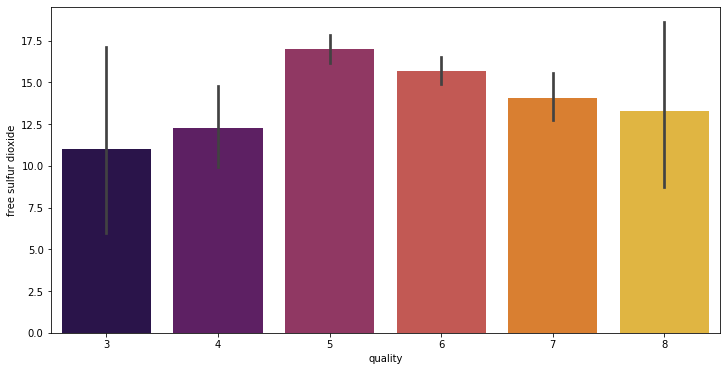

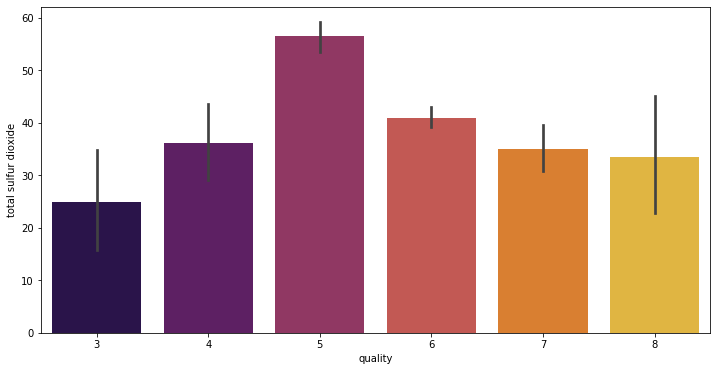

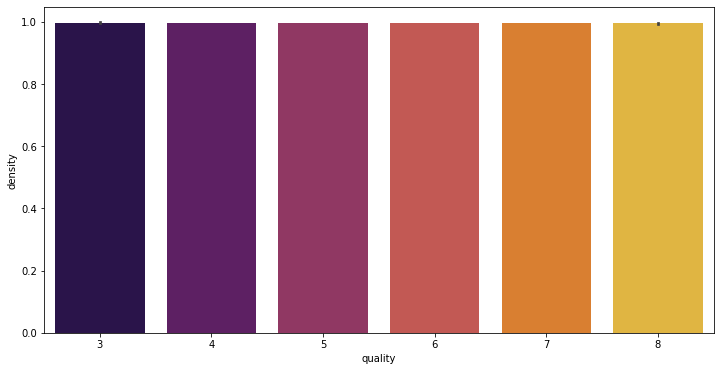

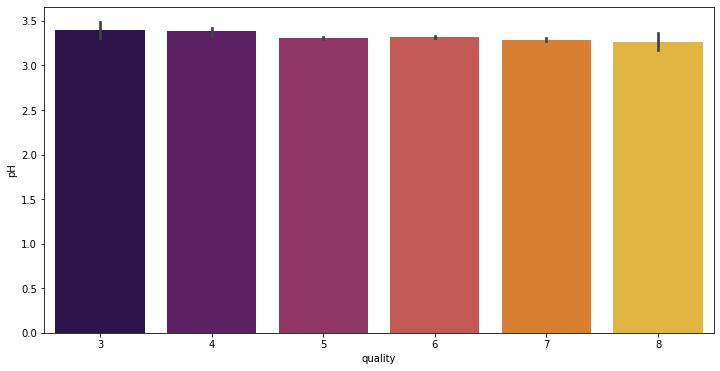

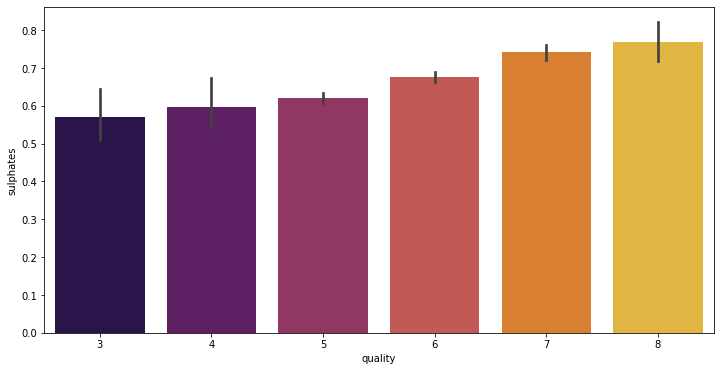

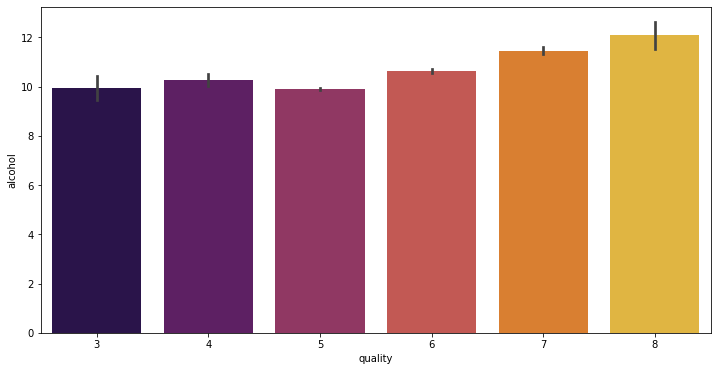

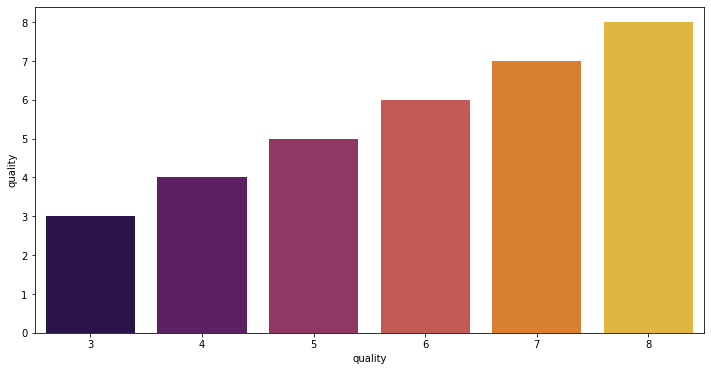

In [10]:
for i in col:
    plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality' , y = i , data = wine, palette = "inferno")
    plt.show()

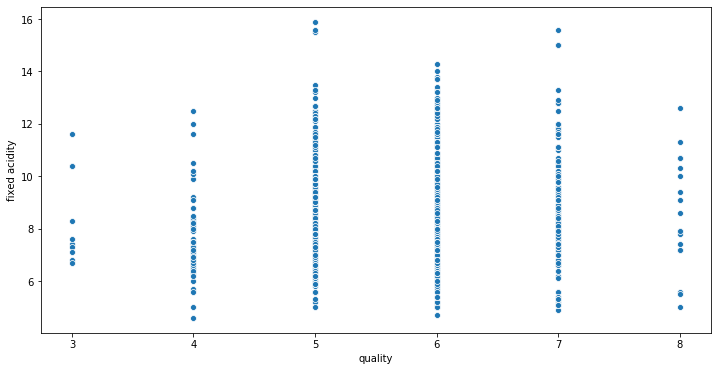

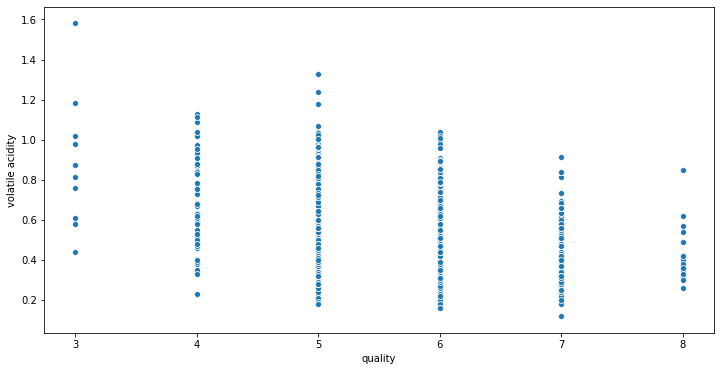

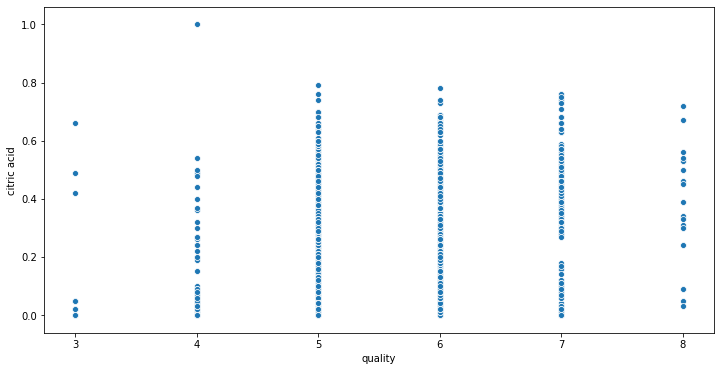

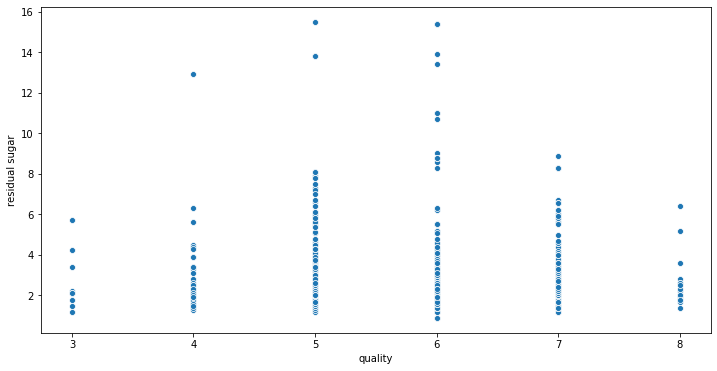

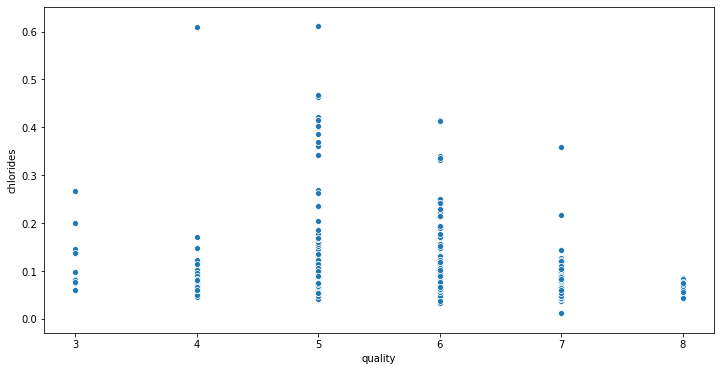

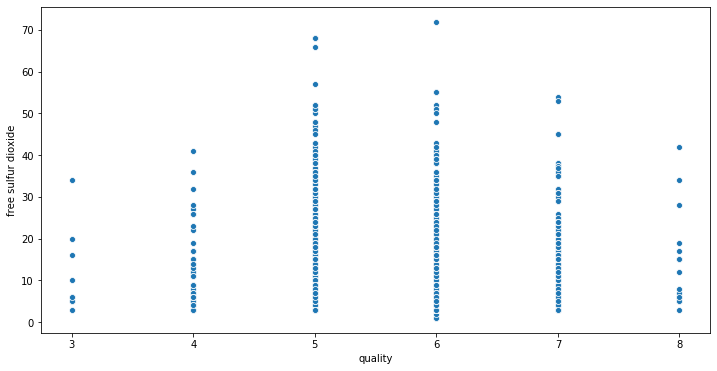

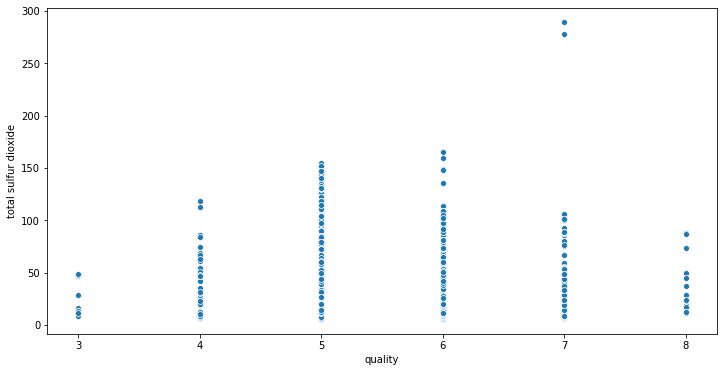

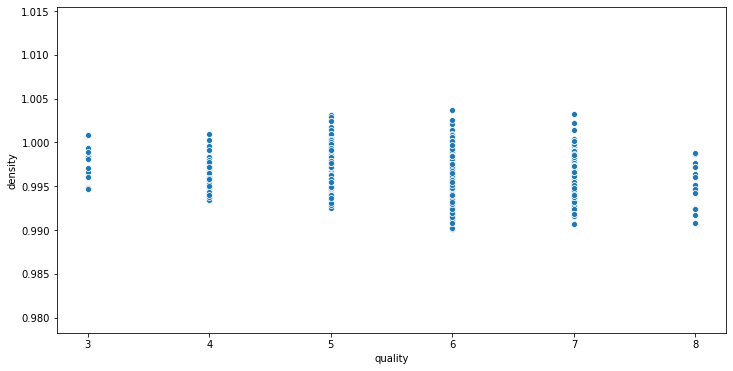

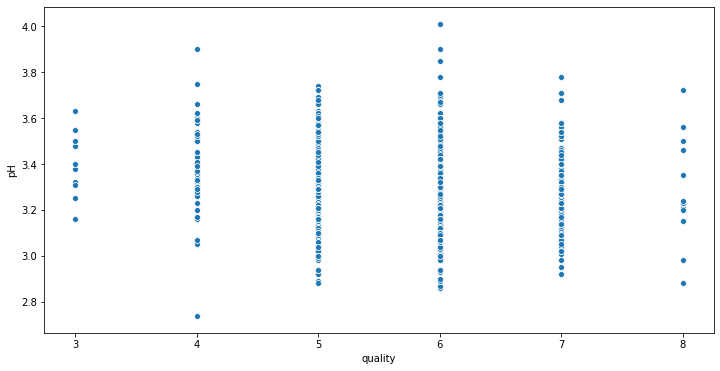

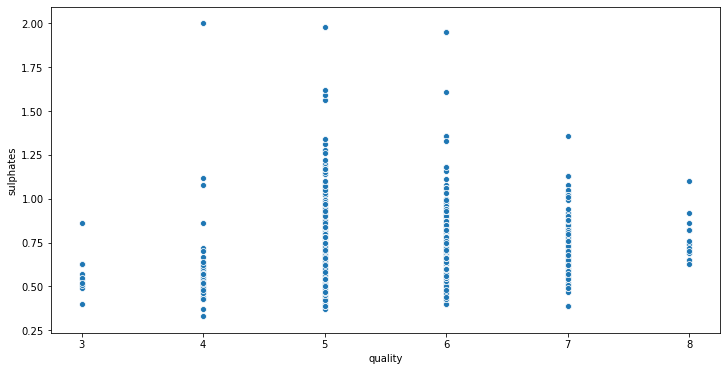

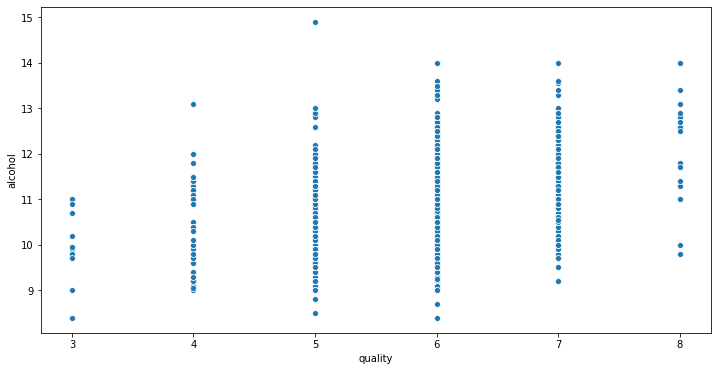

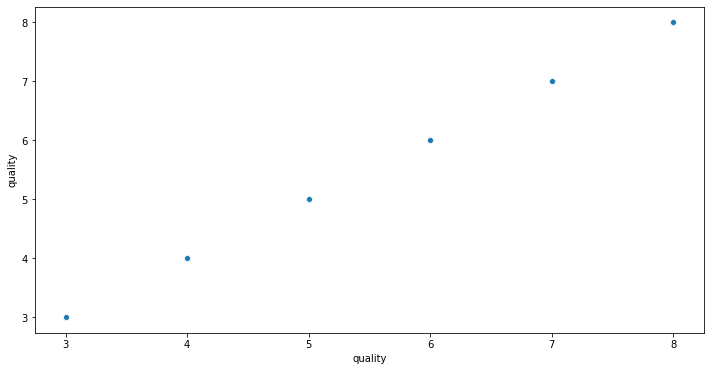

In [11]:
for i in col:
    plt.figure(figsize = (12,6))
    sns.scatterplot(x = 'quality' , y = i , data = wine)
    plt.show()

Above is the graphical representation of the columns with their values and we can see that there are various outliers in several columns.

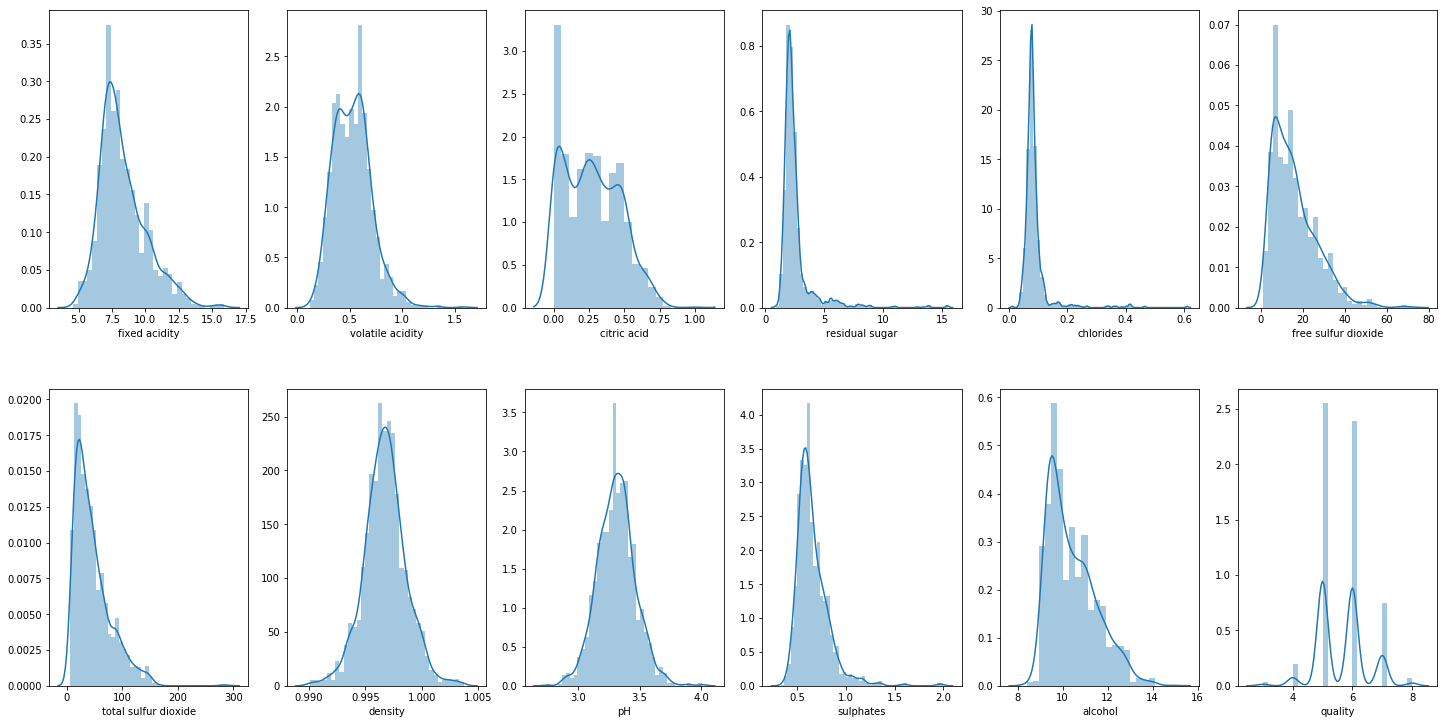

In [12]:
fig,ax= plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index =0
ax= ax.flatten()

for col,value in wine.items():
    if col !='type':
        sns.distplot(value,ax=ax[index])
        index +=1
        plt.tight_layout(pad=0.5,w_pad=0.7 , h_pad=5.0)

The above the graphical representation of the data, showing the type of distribution our data set is having:-
    
    1. some of the columns are skewed.
    2. the data is also not normalised. the building blocks are out of the normalised curved 

In [13]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


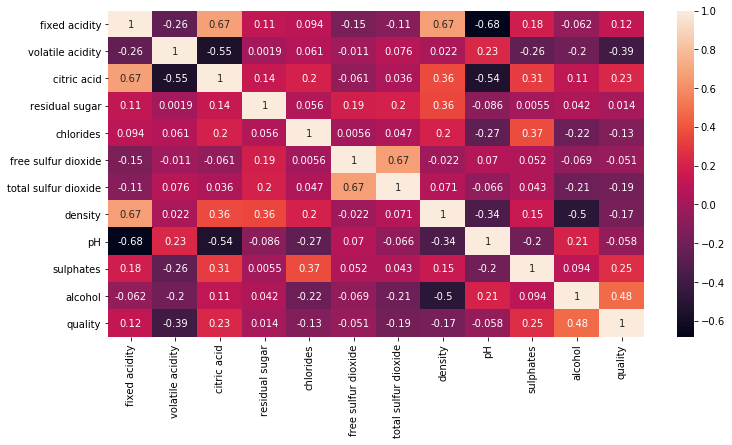

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(wine.corr(), annot = True)
plt.show()

The above details shows the correlation between between several columns in our dataset.
     
     1. The above heatmap shows that alcohol is highy corelated with the quality. Sulphate 2nd most highly corelated,    3rd most is citric acid, fixed acidity,  
     2. Volatile acidity is highly negativaly corelated with the quality. As volaltile acidity is highy negativaly   corelated it won't effect the values of quality. Hence awe can drop this column from our database. 

In [15]:
wine_new = wine.drop('volatile acidity', axis = 1)

In [16]:
print(wine_new.shape)

(1599, 11)


In [17]:
wine_new.describe()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


So, from the boxplot above we checked that we have outliers in dataset, which would affect the quality of our model. So, we will proceed to handle the outliers first. Firstly we will check columns with high skeneww using skew function

In [18]:
wine_new.skew()

fixed acidity           0.982751
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

From the above details we can see that:

    1.fixed acidity 0.982751
    2.residual sugar 4.540655 Highly Skewed
    3.chlorides 5.680347 Highly Skewed
    4.free sulfur dioxide 1.250567
    5.total sulfur dioxide 1.515531
    6.sulphates 2.428672
    7.alcohol 0.860829
    
As for us skeweness is accepted between -0.5 to 0.5, the above columns are highly skewed. so, let's try removing skewness from these columns using yeo johnson method

In [19]:
wine_new['fixed acidity'] = np.log(wine_new['fixed acidity'])
    
print(wine_new['fixed acidity'].skew())

0.3939149942929756


In [20]:
wine_new['residual sugar'] = np.log(wine_new['residual sugar'])
    
print(wine_new['residual sugar'].skew())

1.8068638195807207


In [21]:
from scipy import stats
from scipy.stats import boxcox
wine_new['chlorides'] = stats.boxcox(wine_new['chlorides'])[0]
    
print(wine_new['chlorides'].skew())

-0.49964324850462416


In [22]:
wine_new['free sulfur dioxide'] = stats.boxcox(wine_new['free sulfur dioxide'])[0]
    
print(wine_new['free sulfur dioxide'].skew())

-0.019777750883785125


In [23]:
wine_new['total sulfur dioxide'] = stats.boxcox(wine_new['total sulfur dioxide'])[0]
    
print(wine_new['total sulfur dioxide'].skew())

-0.008028145489947599


In [24]:
wine_new['alcohol'] = stats.boxcox(wine_new['alcohol'])[0]
    
print(wine_new['alcohol'].skew())

0.10936702240086463


In [25]:
wine_new.skew()

fixed acidity           0.393915
citric acid             0.318337
residual sugar          1.806864
chlorides              -0.499643
free sulfur dioxide    -0.019778
total sulfur dioxide   -0.008028
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.109367
quality                 0.217802
dtype: float64

we have successfully removed the skewness from our dataset we will proceed further.

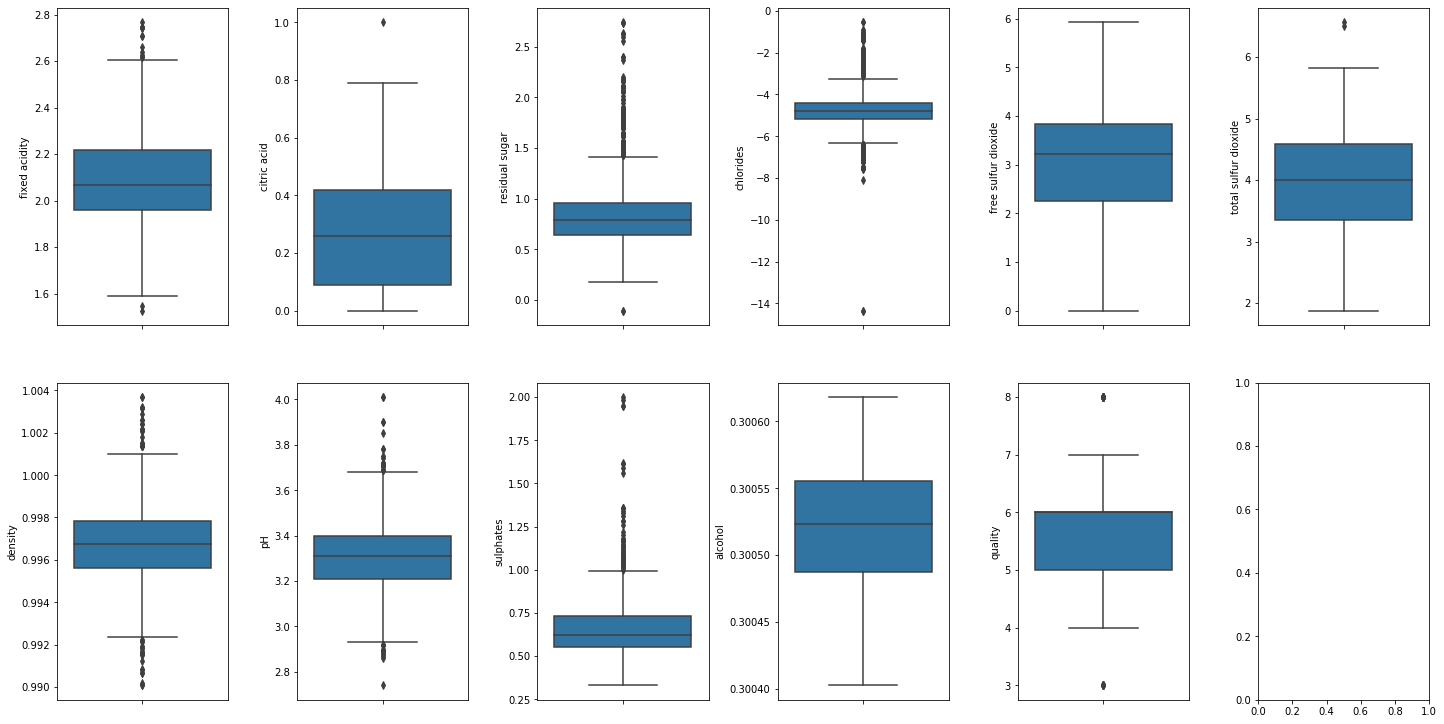

In [26]:
#create box plots
fig,ax= plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index =0
ax= ax.flatten()

for col,value in wine_new.items():
    if col !='type':
        sns.boxplot(y=col,data=wine_new,ax=ax[index])
        index +=1
        plt.tight_layout(pad=0.5,w_pad=0.7 , h_pad=5.0)

From the above graphical representation of our dataset we can check that we have several outliers present in the data set:

    1.Fixed acidity have outliers
    2.residual sugar
    3.Chlorides
    4.density
    5.Ph
    6.Sulphates

Will proceed further to remove the outiers. We can use:-

1. Z-score

In [27]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(wine_new))
threshold=3
np.where(z>3)

(array([  13,   17,   17,   19,   33,   42,   43,   45,   81,   81,   83,
          86,   88,   91,   92,   95,  106,  106,  151,  151,  151,  151,
         163,  164,  169,  169,  181,  226,  226,  240,  243,  244,  258,
         258,  274,  281,  291,  324,  325,  339,  340,  396,  400,  442,
         442,  451,  459,  480,  480,  494,  517,  517,  530,  535,  544,
         554,  554,  555,  555,  557,  557,  595,  608,  614,  639,  649,
         652,  652,  690,  692,  692,  695,  695,  723,  730,  754,  773,
         795,  832,  836,  836,  837,  837,  889,  899,  911,  917,  923,
        1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081,
        1111, 1114, 1165, 1186, 1235, 1244, 1260, 1269, 1270, 1288, 1289,
        1299, 1300, 1316, 1319, 1319, 1321, 1367, 1370, 1370, 1372, 1372,
        1374, 1374, 1434, 1434, 1435, 1435, 1469, 1474, 1474, 1476, 1476,
        1478, 1505, 1574, 1589], dtype=int64),
 array([ 8,  3,  8,  3,  2,  3,  8,  7,  3,  8,  3,  8,  8,  8,  

In [28]:
dff=wine_new[(z<3).all(axis=1)]
print(wine_new.shape)
print(dff.shape)

(1599, 11)
(1494, 11)


In [29]:
prcnt=(1599-1494)/1599*100
prcnt

6.566604127579738

In [30]:
x = wine_new.iloc[:,0:10]
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,0.00,0.641854,-4.920401,2.867882,3.861490,0.99780,3.51,0.56,0.300482
1,2.054124,0.00,0.955511,-4.140122,4.102521,4.686835,0.99680,3.20,0.68,0.300504
2,2.054124,0.04,0.832909,-4.325636,3.317116,4.421290,0.99700,3.26,0.65,0.300504
3,2.415914,0.56,0.641854,-4.963593,3.504207,4.550629,0.99800,3.16,0.58,0.300504
4,2.001480,0.00,0.641854,-4.920401,2.867882,3.861490,0.99780,3.51,0.56,0.300482
...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,0.08,0.693147,-4.391441,4.503448,4.171856,0.99490,3.45,0.58,0.300535
1595,1.774952,0.10,0.788457,-5.614127,4.835265,4.351412,0.99512,3.52,0.76,0.300559
1596,1.840550,0.13,0.832909,-4.920401,4.341848,4.056652,0.99574,3.42,0.75,0.300553
1597,1.774952,0.12,0.693147,-4.963593,4.503448,4.171856,0.99547,3.57,0.71,0.300523


In [31]:
y = pd.DataFrame(wine['quality'])
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [32]:
y['quality'].value_counts() 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [33]:
# Classifying wine quality as Good or Bad based on quality rating
# "Bad" or 0 if quality is in range (1,6) including 6
# 'Good' or 1 if quality is in range (7,10)

y['quality']=y['quality'].apply(lambda x: 1 if x>6 else 0)
y.head()

,quality
0,0
1,0
2,0
3,0
4,0


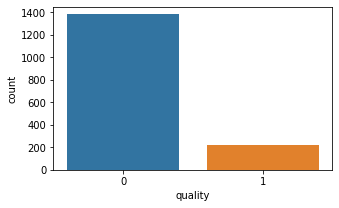

In [34]:
#Bar plot 'Good 1' vs 'Bad 0'
fig = plt.figure(figsize=(5,3))
sns.countplot(y['quality'])

Majority is 'Bad 0'

In [35]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, x , y ):
    x_train, x_test, y_train , y_test = train_test_split(x , y ,test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train,y_train)
    print ("Accuracy:",model.score(x_test,y_test)* 100)
    
# cross- validation
    score =cross_val_score(model,x,y,cv=5)
    print ("CV score:", np.mean(score)*100)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy: 87.25
CV score: 86.30348746081505


In [37]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model,x,y)

Accuracy: 87.0
CV score: 82.17829153605017


In [38]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
classify (model,x,y)

Accuracy: 90.25
CV score: 86.36735893416927


In [39]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
classify(model,x,y)

Accuracy: 92.0
CV score: 86.24294670846395


From the above details we can check that logestic regression model has least difference hence it is best model.

In [40]:
import pickle

In [41]:
filename = 'wine dataset.pkl'

In [42]:
pickle.dump(model, open(filename, 'wb'))